In [1]:
import pandas as pd
import numpy
# Function to remove 'I' from a string
def remove_i_from_string(s):
    return s.replace('I', '')

# Input and output file paths
input_file = '../data/processed/IDPiDataset.xlsx'
output_file = '../data/processed/IDPiDataset_noI.xlsx'

# Specify the column number (0-based index) containing strings
column_to_modify = "3,3â€™ Catalyst Substituent "
# Read the CSV file into a DataFrame
df = pd.read_excel(input_file)

# Remove 'I' from the specified column
df[column_to_modify] = df[column_to_modify].str.replace('(I)', '')
df[column_to_modify] = df[column_to_modify].str.replace('I', '')

# Save the modified data to a new Excel file
df.to_excel(output_file, index=False)


print(f'Done! Modified data saved to {output_file}')

Done! Modified data saved to ../data/processed/IDPiDataset_noI.xlsx


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

# Input Excel file with SMILES data and output folder for PNGs
input_file = 'input.xlsx'
output_folder = '../data/'

# Specify the column name containing SMILES strings
column_name =  "3,3â€™ Catalyst Substituent "
# Replace with the actual column name

# Read the Excel file into a DataFrame
df = pd.read_excel(output_file)

# Ensure the output folder exists
import os
os.makedirs(output_folder, exist_ok=True)

# Iterate through unique SMILES strings in the specified column
unique_smiles = df[column_name].unique()
for smile in unique_smiles:
    molecule = Chem.MolFromSmiles(smile)
    print(smile)
    
    # Check if the SMILES can be converted to a molecule
    if molecule is not None:
        # Generate an image from the molecule and save it as a PNG
        img = Draw.MolToImage(molecule, size=(300, 300))
        img.save(os.path.join(output_folder, f'{smile}.png'))

print(f'Done! PNG images saved to {output_folder}')

c2ccc1ccccc1c2
Cc1cc(C)c2ccc4cccc3ccc1c2c34
c1ccccc1
Cc1ccccc1
CC(C)(C)c1ccccc1
c4ccc3c1ccccc1c2ccccc2c3c4
FC(F)(F)c1cccc(C(F)(F)F)c1
CC3(C)c1ccccc1c2ccccc23
c1cccc2ccccc12
Cc1cc(C)ccc1
CCc1cccc(CC)c1
CCCc1cccc(CCC)c1
CCCCCCc1cccc(CCCCCC)c1
Cc1cc(C)c2CCc4cccc3CCc1c2c34
CC(C)CCc1cccc(CCC(C)C)c1
Cc1cccc(C)c1C
c4ccc3c1ccccc1C2(CCCC2)c3c4
FS(F)(F)(F)(F)c1cccc(S(F)(F)(F)(F)F)c1
FC(F)(F)C(F)(F)C(F)(F)c1cccc(C(F)(F)C(F)(F)C(F)(F)F)c1
FC(F)(F)C(F)(c1cccc(C(F)(C(F)(F)F)C(F)(F)F)c1)C(F)(F)F
c2cccc(c1ccccc1)c2
FS(F)(F)(F)(F)c1ccccc1
c4ccc3c1ccccc1C2(CCC2)c3c4
c3ccc2ccc1ccccc1c2c3
Done! PNG images saved to ../data/


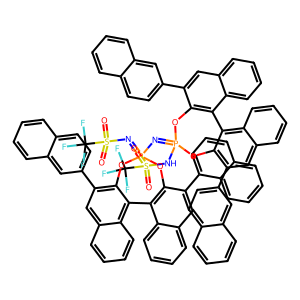

In [12]:
m = "O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2ccc1ccccc1c2)cc3ccccc3c4c8c(O5)c(c7ccc6ccccc6c7)cc9ccccc89)Oc%13c(c%11ccc%10ccccc%10c%11)cc%12ccccc%12c%13c%17c(O%14)c(c%15cccc%16ccccc%15%16)cc%18ccccc%17%18)C(F)(F)F"
molecule = Chem.MolFromSmiles(m)
R="NS(=O)(=O)C(F)(F)F"
R2="c2ccc1ccccc1c2"

Draw.MolToImage(molecule, size=(300, 300))


In [23]:
replacement_patterns = {
    'NS(=O)(=O)C(F)(F)F' : 'R',
    'c2ccc1ccccc1c2' : 'R2'
}
df["catalyst SMILES"] = df["catalyst SMILES"].str.replace('c2ccc1ccccc1c2', 'R2')
df["catalyst SMILES"] = df["catalyst SMILES"].str.replace('NS(=O)(=O)C(F)(F)F', 'R1')

for idx, smile in enumerate(df["catalyst SMILES"].unique()):
    print(smile)
    molecule = Chem.MolFromSmiles(smile)
    
    # Check if the SMILES can be converted to a molecule
    if molecule is not None:
        # Replace the patterns in the molecule
        for pattern, replacement in replacement_patterns.items():
            Chem.ReplaceSubstructs(molecule, Chem.MolFromSmiles(pattern), Chem.MolFromSmiles(replacement))
        
        # Generate an image from the modified molecule and save it as a PNG
        img = Draw.MolToImage(molecule, size=(300, 300))

O=S(=O)(N=P%14(N=P5(R1)Oc4c(R2)cc3ccccc3c4c8c(O5)c(c7ccc6ccccc6c7)cc9ccccc89)Oc%13c(c%11ccc%10ccccc%10c%11)cc%12ccccc%12c%13c%17c(O%14)c(c%15cccc%16ccccc%15%16)cc%18ccccc%17%18)C(F)(F)F
nan


[12:27:12] SMILES Parse Error: syntax error while parsing: O=S(=O)(N=P%14(N=P5(R1)Oc4c(R2)cc3ccccc3c4c8c(O5)c(c7ccc6ccccc6c7)cc9ccccc89)Oc%13c(c%11ccc%10ccccc%10c%11)cc%12ccccc%12c%13c%17c(O%14)c(c%15cccc%16ccccc%15%16)cc%18ccccc%17%18)C(F)(F)F
[12:27:12] SMILES Parse Error: Failed parsing SMILES 'O=S(=O)(N=P%14(N=P5(R1)Oc4c(R2)cc3ccccc3c4c8c(O5)c(c7ccc6ccccc6c7)cc9ccccc89)Oc%13c(c%11ccc%10ccccc%10c%11)cc%12ccccc%12c%13c%17c(O%14)c(c%15cccc%16ccccc%15%16)cc%18ccccc%17%18)C(F)(F)F' for input: 'O=S(=O)(N=P%14(N=P5(R1)Oc4c(R2)cc3ccccc3c4c8c(O5)c(c7ccc6ccccc6c7)cc9ccccc89)Oc%13c(c%11ccc%10ccccc%10c%11)cc%12ccccc%12c%13c%17c(O%14)c(c%15cccc%16ccccc%15%16)cc%18ccccc%17%18)C(F)(F)F'


TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float

In [33]:
column_R = 'N Catalyst Substituent'  # Replace with the actual column name
column_R2 = "3,3â€™ Catalyst Substituent "   # Replace with the actual column name
replacement_patterns = {
    'R': 'NS(=O)(=O)C(F)(F)F',
    'R2': 'c2ccc1ccccc1c2'
}


# Iterate through each row
for index, row in df.iterrows():
    smile = "O=S(=O)(N=P%14(N=P5(NS(=O)(=O)C(F)(F)F)Oc4c(c2ccc1ccccc1c2)cc3ccccc3c4c8c(O5)c(c7ccc6ccccc6c7)cc9ccccc89)Oc%13c(c%11ccc%10ccccc%10c%11)cc%12ccccc%12c%13c%17c(O%14)c(c%15cccc%16ccccc%15%16)cc%18ccccc%17%18)C(F)(F)F"

    molecule = Chem.MolFromSmiles(smile)
    
    # Check if the SMILES can be converted to a molecule
    if molecule is not None:
        # Replace "R" with the value from Column1 and "R2" with the value from Column2
        #modified_smile = smile.replace("NS(=O)(=O)C(F)(F)F", row[column_R]).replace("c2ccc1ccccc1c2", row[column_R2])
        #modified_molecule = Chem.MolFromSmiles(modified_smile)
        replacements = {
            'NS(=O)(=O)C(F)(F)F': row[column_R],
            'c2ccc1ccccc1c2': row[column_R2]
        }
        print(row[column_R2])
        # Replace the patterns with specified values
        modified_molecule = Chem.ReplaceSubstructs(molecule, replacements)
        modified_molecule = modified_molecule[0] 
        
        # Generate an image from the modified molecule and save it as a PNG
        #img = Draw.MolToImage(modified_molecule, size=(300, 300))
        #img.save(os.path.join(output_folder, f'Structure_{index}.png'))

print(f'Done! PNG images saved to {output_folder}')
print(modified_smile)
print(smile)
Draw.MolToImage(modified_molecule, size=(300, 300))

c2ccc1ccccc1c2


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.ReplaceSubstructs(Mol, dict)
did not match C++ signature:
    ReplaceSubstructs(RDKit::ROMol mol, RDKit::ROMol query, RDKit::ROMol replacement, bool replaceAll=False, unsigned int replacementConnectionPoint=0, bool useChirality=False)